# Simple RNN to predict Google's stock price

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [3]:
training_set = dataset_train.iloc[:, 1:2].values #creates a numpy array training_set

In [4]:
training_set.dtype

dtype('float64')

In [5]:
training_set

array([[ 325.25],
       [ 331.27],
       [ 329.83],
       ..., 
       [ 793.7 ],
       [ 783.33],
       [ 782.75]])

## Feature Scaling

Normalization is applied to the data now.

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [7]:
training_set_scaled

array([[ 0.08581368],
       [ 0.09701243],
       [ 0.09433366],
       ..., 
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146]])

## Creating Data Structure with 60 timesteps (3 months) and 1 output

In [8]:
X_train = [] #Initialization with an empty list
Y_train = [] #Initialization with an empty list
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i,0])
# Turning lists into Numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [9]:
X_train

array([[ 0.08581368,  0.09701243,  0.09433366, ...,  0.07846566,
         0.08034452,  0.08497656],
       [ 0.09701243,  0.09433366,  0.09156187, ...,  0.08034452,
         0.08497656,  0.08627874],
       [ 0.09433366,  0.09156187,  0.07984225, ...,  0.08497656,
         0.08627874,  0.08471612],
       ..., 
       [ 0.92106928,  0.92438053,  0.93048218, ...,  0.95475854,
         0.95204256,  0.95163331],
       [ 0.92438053,  0.93048218,  0.9299055 , ...,  0.95204256,
         0.95163331,  0.95725128],
       [ 0.93048218,  0.9299055 ,  0.93113327, ...,  0.95163331,
         0.95725128,  0.93796041]])

In [10]:
X_train.shape

(1198, 60)

## Adding a new dimension

### Reshaping 

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [12]:
X_train

array([[[ 0.08581368],
        [ 0.09701243],
        [ 0.09433366],
        ..., 
        [ 0.07846566],
        [ 0.08034452],
        [ 0.08497656]],

       [[ 0.09701243],
        [ 0.09433366],
        [ 0.09156187],
        ..., 
        [ 0.08034452],
        [ 0.08497656],
        [ 0.08627874]],

       [[ 0.09433366],
        [ 0.09156187],
        [ 0.07984225],
        ..., 
        [ 0.08497656],
        [ 0.08627874],
        [ 0.08471612]],

       ..., 
       [[ 0.92106928],
        [ 0.92438053],
        [ 0.93048218],
        ..., 
        [ 0.95475854],
        [ 0.95204256],
        [ 0.95163331]],

       [[ 0.92438053],
        [ 0.93048218],
        [ 0.9299055 ],
        ..., 
        [ 0.95204256],
        [ 0.95163331],
        [ 0.95725128]],

       [[ 0.93048218],
        [ 0.9299055 ],
        [ 0.93113327],
        ..., 
        [ 0.95163331],
        [ 0.95725128],
        [ 0.93796041]]])

## Building the RNN architecture

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [14]:
regressor = Sequential()

In [15]:
regressor.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.25))

In [16]:
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.25))
regressor.add(LSTM(units = 64, return_sequences = True))
regressor.add(Dropout(0.25))
regressor.add(LSTM(units = 64, return_sequences = False))
regressor.add(Dropout(0.25))

In [17]:
regressor.add(Dense(units= 1))

In [18]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Training the RNN model

In [19]:
regressor.fit(X_train,Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0517
Epoch 2/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0058
Epoch 4/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 7/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 9/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0043
Epoch 10/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.0040
Epoch 11/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0044
Epoch 12/100
1198/1198 [==============================] - 5s 4ms/step - lo

## Testing the RNN model

In [20]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values
real_stock_price

array([[ 778.81],
       [ 788.36],
       [ 786.08],
       [ 795.26],
       [ 806.4 ],
       [ 807.86],
       [ 805.  ],
       [ 807.14],
       [ 807.48],
       [ 807.08],
       [ 805.81],
       [ 805.12],
       [ 806.91],
       [ 807.25],
       [ 822.3 ],
       [ 829.62],
       [ 837.81],
       [ 834.71],
       [ 814.66],
       [ 796.86]])

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [22]:
inputs

array([[ 0.9299055 ],
       [ 0.93113327],
       [ 0.92750577],
       [ 0.94415507],
       [ 0.93876032],
       [ 0.93403527],
       [ 0.93483518],
       [ 0.9313937 ],
       [ 0.94636878],
       [ 0.96569685],
       [ 0.97510976],
       [ 0.95966962],
       [ 0.97808617],
       [ 1.        ],
       [ 0.98076494],
       [ 0.97083116],
       [ 0.98450406],
       [ 0.96054394],
       [ 0.9371419 ],
       [ 0.92841729],
       [ 0.90804747],
       [ 0.8771858 ],
       [ 0.92153434],
       [ 0.93809063],
       [ 0.93165414],
       [ 0.95254483],
       [ 0.88812412],
       [ 0.88637547],
       [ 0.87032145],
       [ 0.88563137],
       [ 0.90743359],
       [ 0.91571173],
       [ 0.89941588],
       [ 0.91805566],
       [ 0.9089404 ],
       [ 0.9024853 ],
       [ 0.89456061],
       [ 0.91600938],
       [ 0.9132934 ],
       [ 0.88979835],
       [ 0.86589404],
       [ 0.89030062],
       [ 0.90335962],
       [ 0.89642086],
       [ 0.91777662],
       [ 0

In [23]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
from keras.models import load_model
regressor.save('RNN_model_trained.h5')

In [25]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [26]:
predicted_stock_price

array([[ 775.24493408],
       [ 772.32275391],
       [ 771.99145508],
       [ 773.22106934],
       [ 776.57366943],
       [ 782.57580566],
       [ 788.59997559],
       [ 791.74145508],
       [ 792.53277588],
       [ 792.20733643],
       [ 791.65124512],
       [ 791.12329102],
       [ 790.76080322],
       [ 791.0994873 ],
       [ 791.95776367],
       [ 796.15368652],
       [ 803.04492188],
       [ 810.97106934],
       [ 816.07696533],
       [ 813.24694824]], dtype=float32)

## Visualization of results

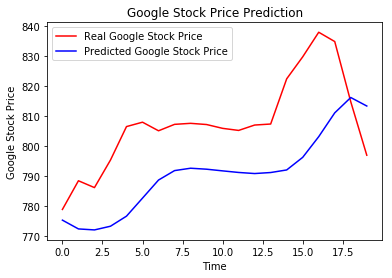

In [27]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()